<div style="background-color:Skyblue;padding: 15px"> CA2 - Capstone Project - Dublin Rent Prediction </div>

<div style="background-color:gold;padding: 5px"> CA2 - Pre-Processing of Data</div>

In [1]:
# Load the Libraries for data manipulation
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [2]:
# Load the csv file
df = pd.read_csv('RIQ02.Dublin.csv')
df.head()

,STATISTIC Label,Quarter,Number of Bedrooms,Property Type,Location,UNIT,VALUE
0,RTB Average Monthly Rent Report,2020Q4,One bed,Semi detached house,Dublin,Euro,1171.91
1,RTB Average Monthly Rent Report,2020Q4,One bed,Terrace house,Dublin,Euro,1267.63
2,RTB Average Monthly Rent Report,2020Q4,One bed,Apartment,Dublin,Euro,1447.47
3,RTB Average Monthly Rent Report,2020Q4,Two bed,Semi detached house,Dublin,Euro,1691.12
4,RTB Average Monthly Rent Report,2020Q4,Two bed,Terrace house,Dublin,Euro,1678.96


In [3]:
# Check the Row&Column count. Display the column type
display(df.shape)
display(df.info())

(126, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   STATISTIC Label     126 non-null    object 
 1   Quarter             126 non-null    object 
 2   Number of Bedrooms  126 non-null    object 
 3   Property Type       126 non-null    object 
 4   Location            126 non-null    object 
 5   UNIT                126 non-null    object 
 6   VALUE               126 non-null    float64
dtypes: float64(1), object(6)
memory usage: 7.0+ KB


None

In [4]:
# Display unique values in each column and their count
for col in df.select_dtypes(object):
    unique_value = df[col].value_counts()
    print(f"Unique Number of value in Column '{col}' is '{df[col].nunique()}':")
    print("----------------------")
    print(unique_value.to_string())
    print("\n")

Unique Number of value in Column 'STATISTIC Label' is '1':
----------------------
STATISTIC Label
RTB Average Monthly Rent Report    126


Unique Number of value in Column 'Quarter' is '14':
----------------------
Quarter
2020Q4    9
2021Q1    9
2021Q2    9
2021Q3    9
2021Q4    9
2022Q1    9
2022Q2    9
2022Q3    9
2022Q4    9
2023Q1    9
2023Q2    9
2023Q3    9
2023Q4    9
2024Q1    9


Unique Number of value in Column 'Number of Bedrooms' is '3':
----------------------
Number of Bedrooms
One bed      42
Two bed      42
Three bed    42


Unique Number of value in Column 'Property Type' is '3':
----------------------
Property Type
Semi detached house    42
Terrace house          42
Apartment              42


Unique Number of value in Column 'Location' is '1':
----------------------
Location
Dublin    126


Unique Number of value in Column 'UNIT' is '1':
----------------------
UNIT
Euro    126




In [5]:
# Drop the column 'STATISTIC Label', 'Location' 'UNIT'
if 'STATISTIC Label' in df.columns:
    df = df.drop('STATISTIC Label', axis=1)
    
if 'Location' in df.columns:
    df = df.drop('Location', axis=1)

if 'UNIT' in df.columns:
    df = df.drop('UNIT', axis=1)

df.head()

,Quarter,Number of Bedrooms,Property Type,VALUE
0,2020Q4,One bed,Semi detached house,1171.91
1,2020Q4,One bed,Terrace house,1267.63
2,2020Q4,One bed,Apartment,1447.47
3,2020Q4,Two bed,Semi detached house,1691.12
4,2020Q4,Two bed,Terrace house,1678.96


In [6]:
# Replace value 'Number of Bedrooms' to 1, 2, 3
df['Number of Bedrooms'] = df['Number of Bedrooms'].replace('One bed',1)
df['Number of Bedrooms'] = df['Number of Bedrooms'].replace('Two bed',2)
df['Number of Bedrooms'] = df['Number of Bedrooms'].replace('Three bed',3)

# Replace value 'Property Type' to 0, 1, 2. Apartment-> 0, Terrace house ->1, Semi detached house ->2
df['Property Type'] = df['Property Type'].replace('Apartment',0)
df['Property Type'] = df['Property Type'].replace('Terrace house',1)
df['Property Type'] = df['Property Type'].replace('Semi detached house',2)

df.head()

,Quarter,Number of Bedrooms,Property Type,VALUE
0,2020Q4,1,2,1171.91
1,2020Q4,1,1,1267.63
2,2020Q4,1,0,1447.47
3,2020Q4,2,2,1691.12
4,2020Q4,2,1,1678.96


In [7]:
# checking for duplicate rows
print("Total number of duplicate rows: ", df.duplicated().sum())

Total number of duplicate rows:  0


In [10]:
# # Convert 'Quarter' to pandas PeriodIndex
# df['Quarter'] = pd.PeriodIndex(df['Quarter'], freq='Q')

# df.head()
df['Quarter'] = df['Quarter'].str.replace('Q', '0')
df.head()

,Quarter,Number of Bedrooms,Property Type,VALUE
0,202004,1,2,1171.91
1,202004,1,1,1267.63
2,202004,1,0,1447.47
3,202004,2,2,1691.12
4,202004,2,1,1678.96


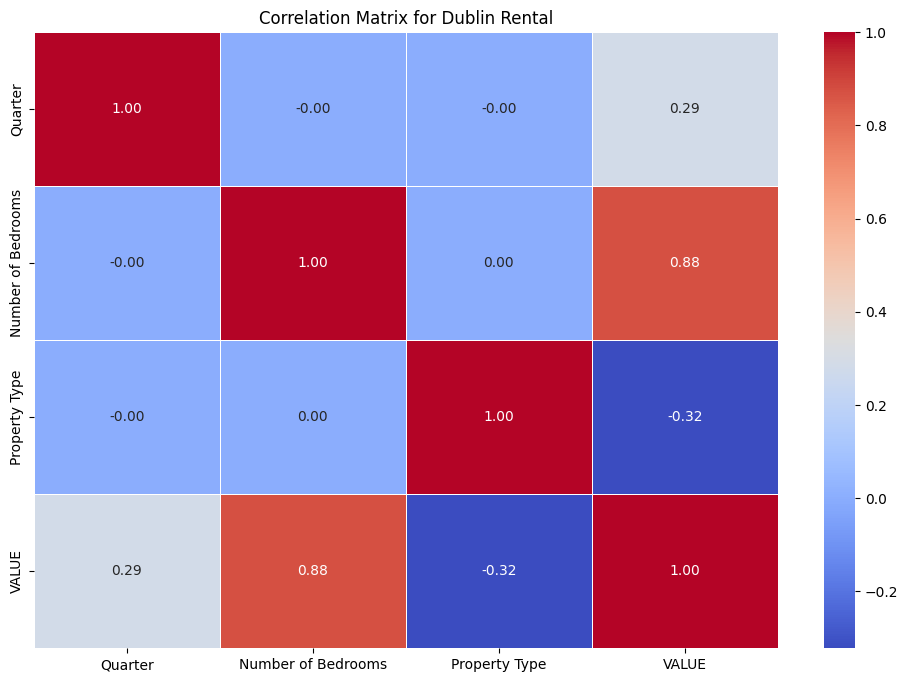

In [11]:
# # Correlation heatmap to check the features that are of high importance to dependent variable
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Dublin Rental")
plt.show()

In [ ]:
# # Plot the data
# plt.figure(figsize=(8, 5))
# plt.plot(df['quarter'].astype(str), df['value'], marker='o', label='Quarterly Values')
# plt.title('Quarterly Data Visualization')
# plt.xlabel('Quarter')
# plt.ylabel('Value')
# plt.grid(True)
# plt.xticks(rotation=45)
# plt.legend()
# plt.tight_layout()

# # Show the plot
# plt.show()

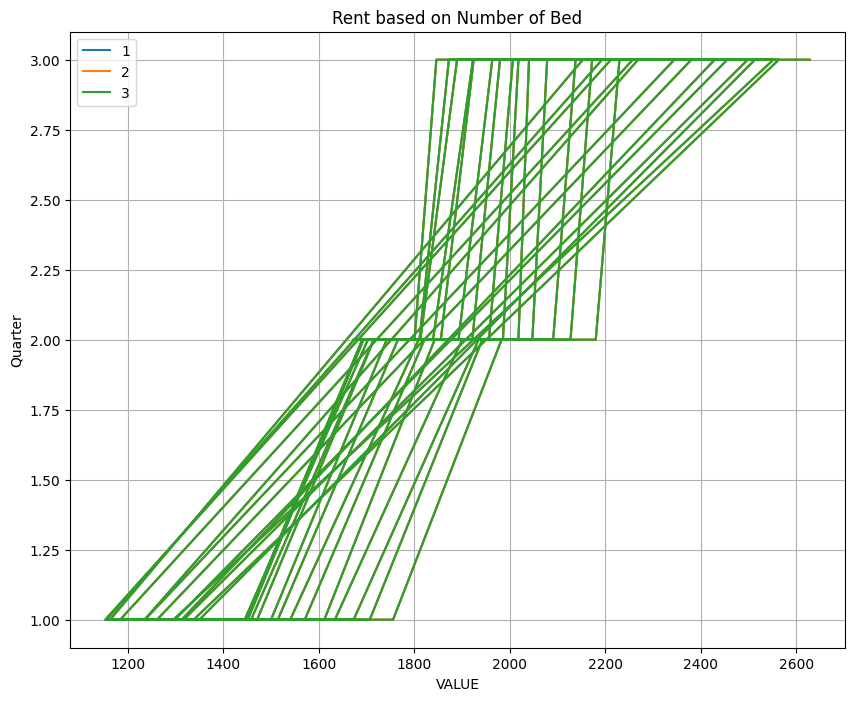

In [28]:
# Group by 'Number of Bedrooms' column
grouped = df.groupby('Number of Bedrooms')

# Plot a graph for each group
plt.figure(figsize=(10, 8))
for name, group in grouped:
    plt.plot(df['VALUE'], df['Number of Bedrooms'], label=name)

plt.title('Rent based on Number of Bed')
plt.xlabel('VALUE')
plt.ylabel('Quarter')
plt.legend()
plt.grid(True)
plt.show()